In [192]:
import numpy as np
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.signal import convolve, fftconvolve, stft, resample
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import wave

In [156]:
def from_wav(fname):
    samplerate, sound_arr = wavfile.read(fname)
    if sound_arr.shape[1] > 1:
        data = sound_arr[:, 0]
    else:
        data = sound_arr
    
    return samplerate, data / 2**15

def to_wav(fname, samplerate, data):
    wavfile.write(fname, samplerate, data)

def normalize(x):
    normalization = (np.sum(np.square(x)))**0.5
    return x / normalization

def convolve_rt(data, ir, window_size=2048):
    convolutions = []
    for 
    

In [157]:
rate, irdata = from_wav("IMreverbs/French 18th Century Salon.wav")

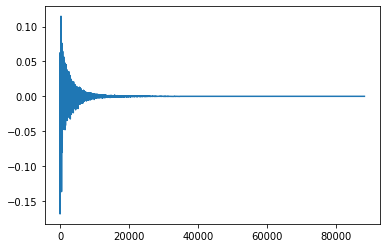

In [158]:
irdata = normalize(irdata)
plt.plot(irdata)

<ipython-input-156-b78e8db809f3>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_arr = wavfile.read(fname)


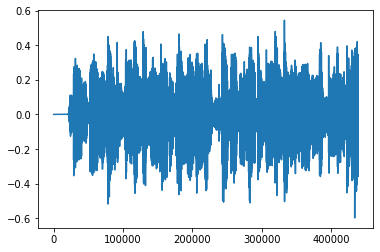

In [159]:
_, all_star = from_wav('all_star.wav')
plt.plot(all_star)

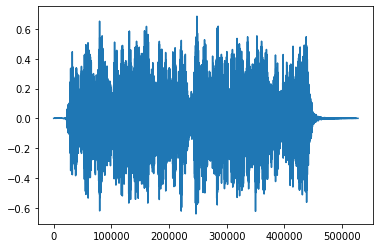

In [185]:
convolved = fftconvolve(irdata, all_star)
plt.plot(convolved) 

In [161]:
to_wav('convolved.wav', rate, convolved)

In [162]:
_, guitar = from_wav('guitar.wav')

<ipython-input-156-b78e8db809f3>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_arr = wavfile.read(fname)


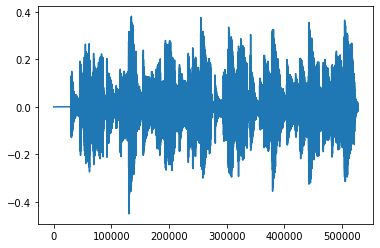

In [179]:
guitar = guitar[:len(convolved)]
plt.plot(guitar)

In [164]:
freqs, times, Zxx = stft(guitar, rate, nperseg=1024)
times


array([ 0.        ,  0.01160998,  0.02321995,  0.03482993,  0.04643991,
        0.05804989,  0.06965986,  0.08126984,  0.09287982,  0.1044898 ,
        0.11609977,  0.12770975,  0.13931973,  0.15092971,  0.16253968,
        0.17414966,  0.18575964,  0.19736961,  0.20897959,  0.22058957,
        0.23219955,  0.24380952,  0.2554195 ,  0.26702948,  0.27863946,
        0.29024943,  0.30185941,  0.31346939,  0.32507937,  0.33668934,
        0.34829932,  0.3599093 ,  0.37151927,  0.38312925,  0.39473923,
        0.40634921,  0.41795918,  0.42956916,  0.44117914,  0.45278912,
        0.46439909,  0.47600907,  0.48761905,  0.49922902,  0.510839  ,
        0.52244898,  0.53405896,  0.54566893,  0.55727891,  0.56888889,
        0.58049887,  0.59210884,  0.60371882,  0.6153288 ,  0.62693878,
        0.63854875,  0.65015873,  0.66176871,  0.67337868,  0.68498866,
        0.69659864,  0.70820862,  0.71981859,  0.73142857,  0.74303855,
        0.75464853,  0.7662585 ,  0.77786848,  0.78947846,  0.80

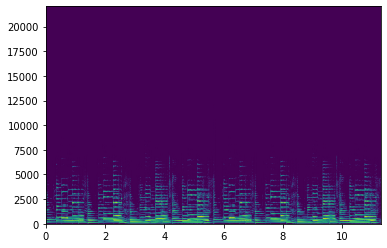

In [165]:
plt.pcolormesh(times, freqs, np.log(np.square(np.abs(Zxx)) + 1e-7), shading='gouraud')

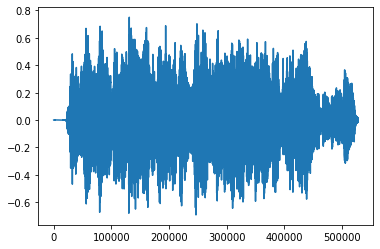

In [180]:
combined = convolved + guitar
plt.plot(combined)

In [181]:
to_wav('combine.wav', rate, combined)

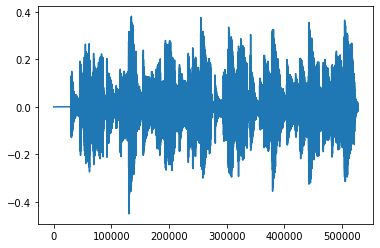

In [182]:
clean = combined - convolved
plt.plot(clean)

In [183]:
to_wav('clean.wav', rate, clean)

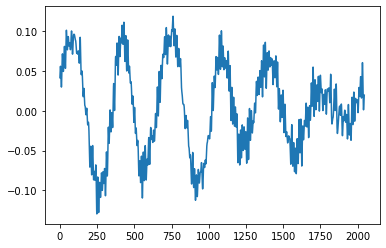

In [186]:
all_star2046 = all_star[100000:100000+2046]
plt.plot(all_star2046)

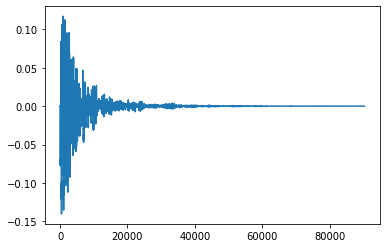

In [194]:
irdata2046 = resample(irdata, 2046)
convolved2046 = convolve(all_star2046, irdata, mode='full')
plt.plot(convolved2046)

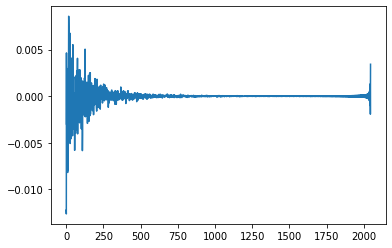

In [195]:
irdata2046 = resample(irdata, 2046)
convolved2046 = convolve(all_star2046, irdata, mode='full')
plt.plot(irdata2046)